# Project Tallberg Trial: NLP 

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string 

pd.set_option('display.max_colwidth', 350)

#### Stopwords 

In [2]:
stopwords = nltk.corpus.stopwords.words('english')

#### Instantiating Porter Stemmer

In [3]:
ps = nltk.PorterStemmer()

#### Instantiating Wordnet Lemmatizer

In [4]:
wnl = nltk.WordNetLemmatizer()

# 1) Read & Clean Raw Data
1) All Submissions 2) Short-listed 3) Finalists

#### 1.1.1 Read All Submissions

In [5]:
filename = "2018 Nominations Leadership Prize.xlsx" 
data = pd.DataFrame(pd.read_excel(filename,sheet_name='All Submissions'))
print(data.shape)
data.head()


(770, 22)


,Submission ID,Submission Date,First Name (nominator),Last Name (nominator),Nominator's organizational affiliation,E-mail,Phone number,Are you willing to be contacted about this candidate?,How did you hear about the Global Leadership Prize?,"If you selected other, please specify:",...,Name of nominee (Last Name),Add additional names if nominating multiple people/organization,Organizational affiliation,E-mail 2,Nominee's country,"In the nominator's own words, why this nominee deserves the Global Leadership Prize",Option 1 - Upload a file (max 10MB),Option 2 - Paste in text,Other sources,Upload your files (max 10MB)
0,4054559128179150173,2018-06-22 01:51:52,Wajid,Khan,NaN,khanafghan121131@gmail.com,00923329516970,Yes,Social media,NaN,...,Zaland,NaN,NaN,zahid.zaland@gmail.com,AF,"Mr.Zahid Zaland is a well educated person. He is graduated from the university and he is a professional personality. He know Four languages completely; English, Pashto, Dari-Persion and Urdu.\nHe has best knowledge in Information Technolgy (IT), Internet and Educating people.\n\nHe has a Welfare Foundation which helps with poor people, refugees...",https://www.jotform.com/uploads/tallbergfoundation/80993714127967/4054559128179150173/Zahid CV.doc,NaN,https://twitter.com/zahidZaland\n\nhttps://ps.wikipedia.org/wiki/%D8%B2%D8%A7%D9%87%D8%AF%D8%A7%D9%84%D9%84%D9%87_%DA%81%D9%84%D8%A7%D9%86%D8%AF\n\nhttps://facebook.com/zahid.Zaland\n,NaN
1,4059395972021686177,2018-06-27 16:13:17,Miskieh,Leona,NaN,miskiehleona@gmail.com,NaN,Yes,Social media,NaN,...,Mugudo,NaN,National Environment Management Authority,mitchellemugudo@ymail.com,KE,"Yvette is a courageous Young person and always choose to see glass as half full instead of half empty. She tries to create environmental awareness through visiting schools and giving a talk on the same, her blog dabbed as 'environmentandculture.wordpress.com' and her YouTube Mitchelle Mugudo where by she writes on environmental issues or topics...",https://www.jotform.com/uploads/tallbergfoundation/80993714127967/4059395972021686177/Yvettes_CV.pdf,NaN,https://www.youtube.com/watch?v=S3QtSWNX694&t=10s\n\nhttps://environmentandculture.wordpress.com/\n\n,NaN
2,4055640883115054025,2018-06-23 07:54:50,Jenna,Nambi,Prudential Insurance,jennanambi@gmail.com,0784502434,Yes,Tällberg Foundation Website,NaN,...,Mutyaba,NaN,"Muno Konsult, Church of Uganda,",yusmutz@yahoo.com,UG,"The nominee is an agricultural graduate from Makerere University and he has held several leadership positions such as a youth Chairman in Wakiso District. \nIn Wakiso, the nominee formulated a garbage management system that has helped the Town Council to manage garbage. He has published several agricultural manuals to enable farmers access tec...",https://www.jotform.com/uploads/tallbergfoundation/80993714127967/4055640883115054025/Resume_Mutyaba Yusuf_March 2018.docx,NaN,Wakiso Town Council \nUganda National Library \nDemocratic Party Convention,https://www.jotform.com/uploads/tallbergfoundation/80993714127967/4055640883115054025/20171009_161108.jpg | https://www.jotform.com/uploads/tallbergfoundation/80993714127967/4055640883115054025/20171216_153924.jpg | https://www.jotform.com/uploads/tallbergfoundation/80993714127967/4055640883115054025/IMG-20170705-WA0000.jpg
3,4042818493317586098,2018-06-08 11:44:09,Rosemarie Alanna,Choo-Shee-Nam,Online contact,commonwealthlawyer2007@gmail.com,592-223-6871,Yes,NaN,NaN,...,Doerga,"I am sure some of the Organisations would nominate Mr Doerga not only as a Social Entrepreneur but having done lots of work in the Investment and Interpersonal skills development with a view to improving both the Quality of Employment and raising the consciousness of attitude to work, time management and important facets of Organisational skill...","Referrals of Former students, job placement options and additional Training for Self Employment",vishnudoerga@actioncoach.com,GY,Global reach in terms of the scope of topics and training he completed. History 

In [6]:
cols = ["Submission ID", "First Name (nominator)","Last Name (nominator) ","Name of nominee (First Name)","Name of nominee (Last Name)","In the nominator's own words, why this nominee deserves the Global Leadership Prize"]
data = data [cols]
data.rename({'Submission ID':'ID',"First Name (nominator)":"nominator_fn","Last Name (nominator) ":"nominator_ln","Name of nominee (First Name)":"nominee_fn","Name of nominee (Last Name)":"nominee_ln",'In the nominator\'s own words, why this nominee deserves the Global Leadership Prize':'raw_text' }, axis='columns',inplace=True)
data.head()

,ID,nominator_fn,nominator_ln,nominee_fn,nominee_ln,raw_text
0,4054559128179150173,Wajid,Khan,zz_Zahidullah,Zaland,"Mr.Zahid Zaland is a well educated person. He is graduated from the university and he is a professional personality. He know Four languages completely; English, Pashto, Dari-Persion and Urdu.\nHe has best knowledge in Information Technolgy (IT), Internet and Educating people.\n\nHe has a Welfare Foundation which helps with poor people, refugees..."
1,4059395972021686177,Miskieh,Leona,zz_Yvette,Mugudo,"Yvette is a courageous Young person and always choose to see glass as half full instead of half empty. She tries to create environmental awareness through visiting schools and giving a talk on the same, her blog dabbed as 'environmentandculture.wordpress.com' and her YouTube Mitchelle Mugudo where by she writes on environmental issues or topics..."
2,4055640883115054025,Jenna,Nambi,zz_Yusuf,Mutyaba,"The nominee is an agricultural graduate from Makerere University and he has held several leadership positions such as a youth Chairman in Wakiso District. \nIn Wakiso, the nominee formulated a garbage management system that has helped the Town Council to manage garbage. He has published several agricultural manuals to enable farmers access tec..."
3,4042818493317586098,Rosemarie Alanna,Choo-Shee-Nam,zz_Vishnu,Doerga,Global reach in terms of the scope of topics and training he completed. History on the Action Coach website.\nHis own portfolio an admixture of business acumen and academics\nHappier work environment and knowledge of working smarter.
4,4052779110216539211,Tonika,Yepthomi,zz_Tonika,Yepthomi,She was awarded the prestigious International Leaders in Education Program ( ILEP)in the year 2016 by the US Department of State


In [7]:
# data  = pd.read_json('data_raw.json')
# print(data.shape)
# print(data.columns)

# data.rename({'In the nominator\'s own words, why this nominee deserves the Global Leadership Prize':'raw_text', 'Submission ID':'ID' }, axis='columns',inplace=True)
# # print(data['raw_text'][0])
# print(data)

#### 1.1.2 Read Shortlist

In [8]:
# shortlist = pd.read_json('short_list.json')
# print(shortlist.shape)
# print(shortlist.columns)

In [9]:
filename = "2018 Nominations Leadership Prize.xlsx" 

shortlist = pd.DataFrame(pd.read_excel(filename,sheet_name='Shortlisted'))['Submission ID']
shortlist

0     4060217547515009799
1     4061916407105807700
2     4011522553859516142
3     4026614933019096638
4     4061086699916847930
5     4030426374414655533
6     4031445465118450412
7     4054203876617880934
8     4054490955422264356
9     4054583900312134602
10    4057417647276143745
11    4057513811956555010
12    4057686732813734876
13    4058859571894970007
14    4059287784831665727
15    4050774860611106515
16    4060440113527229348
17    4059941648225527711
18    4061821000023751379
19    4060045242853396764
20    4060126222014328948
21    4060396091515422471
22    4059343719222917072
23    4060651047621366876
24    4061657616228225873
25    4060768900336778666
26    4061269290819224384
27    4060782114719973372
28    4059807256611806674
29    4061121247986625832
             ...         
34    4066115458303938939
35    4061748586018943238
36    4061213591836512961
37    4059653260428191051
38    4061304792815770045
39    4061568127789553326
40    4061634881426871622
41    406357

In [10]:
def check_shortlist(ID,idlist):
    if ID in idlist:
        return "Pass"
    else:
        return "Not Pass"

idlist = list(shortlist)
data['label_short'] = data['ID'].apply(lambda x: check_shortlist(x,idlist))
data['label_short'][data['label_short']=='Pass']

83     Pass
92     Pass
98     Pass
137    Pass
150    Pass
152    Pass
163    Pass
210    Pass
213    Pass
226    Pass
237    Pass
244    Pass
247    Pass
253    Pass
258    Pass
276    Pass
278    Pass
279    Pass
281    Pass
314    Pass
346    Pass
349    Pass
367    Pass
370    Pass
393    Pass
401    Pass
425    Pass
429    Pass
438    Pass
446    Pass
       ... 
484    Pass
486    Pass
488    Pass
491    Pass
495    Pass
503    Pass
504    Pass
521    Pass
529    Pass
541    Pass
549    Pass
572    Pass
576    Pass
589    Pass
596    Pass
612    Pass
620    Pass
625    Pass
631    Pass
647    Pass
653    Pass
667    Pass
674    Pass
706    Pass
712    Pass
715    Pass
732    Pass
758    Pass
759    Pass
760    Pass
Name: label_short, Length: 64, dtype: object

#### 1.1.3 Read Finalists

In [11]:
# finalist = pd.read_json('finalists.json')
# print(finalist.shape)
# print(finalist.columns)

In [12]:
filename = "2018 Nominations Leadership Prize.xlsx" 

finalist = pd.DataFrame(pd.read_excel(filename,sheet_name='Finalists'))['Submission ID']
finalist

0    4061634881426871622
1    4061086699916847930
2    4059941648225527711
3    4026614933019096638
4    4061675026521393919
5    4061121247986625832
6    4060782114719973372
Name: Submission ID, dtype: int64

In [13]:
def check_finalist(ID,idlist):
    if ID in idlist:
        return "Pass"
    else:
        return "Not Pass"

idlist = list(finalist)
data['label_final'] = data['ID'].apply(lambda x: check_finalist(x,idlist))
data['label_final'][data['label_final']=='Pass']

152    Pass
226    Pass
278    Pass
281    Pass
647    Pass
667    Pass
712    Pass
Name: label_final, dtype: object

### 1.2 Clean Text 
##### 1)Remove punctuation 2) Tokenize text 3) Remove stopwords 4) Stem text OR Lemmatize text

In [1]:
from nltk.corpus import wordnet as wn

def clean_text(text):
    #Remove Punctuation
    text   = "".join([word.lower() for word in text if word not in string.punctuation]) 
    #Remove numbers
    text   = re.sub('[a-z0-9]+[0-9]+','',text) #Removes cases like a9 or 99
    text   = re.sub('[0-9]+[a-z0-9]+','',text) #Removes cases like 6th
    text   = re.sub('[0-9]+','',text)          #Removes remaining single digit numbers
    
    tokens = re.split('\W+',text)
    
    # With lemmatizing
    #text   = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) >2] 

    #Without lemmatizing or stemming
    #text   = [word for word in tokens if word not in stopwords and len(word)>2] 

    # With stemming
    # Conditions: if 1. word is not a stopword, 2. length of word more than 2 chars, 3. and is an english word
    text   = [ps.stem(word) for word in tokens if word not in stopwords and len(word)>2 and wn.synsets(word)]  

    return text

# data['clean_text'] = data['raw_text'].apply(lambda x: clean_text(x))
# data['clean_text'][0]

In [30]:
synsets = wn.synsets('change')
hyper = lambda s: s.hypernyms()

lists = [list(syn.closure(hyper)) for syn in synsets]
lists

[[Synset('happening.n.01'),
  Synset('event.n.01'),
  Synset('psychological_feature.n.01'),
  Synset('abstraction.n.06'),
  Synset('entity.n.01')],
 [Synset('relation.n.01'), Synset('abstraction.n.06'), Synset('entity.n.01')],
 [Synset('action.n.01'),
  Synset('act.n.02'),
  Synset('event.n.01'),
  Synset('psychological_feature.n.01'),
  Synset('abstraction.n.06'),
  Synset('entity.n.01')],
 [Synset('consequence.n.01'),
  Synset('phenomenon.n.01'),
  Synset('process.n.06'),
  Synset('physical_entity.n.01'),
  Synset('entity.n.01')],
 [Synset('cash.n.01'),
  Synset('currency.n.01'),
  Synset('medium_of_exchange.n.01'),
  Synset('standard.n.01'),
  Synset('system_of_measurement.n.01'),
  Synset('measure.n.02'),
  Synset('abstraction.n.06'),
  Synset('entity.n.01')],
 [Synset('thing.n.08'), Synset('entity.n.01')],
 [Synset('clothing.n.01'),
  Synset('consumer_goods.n.01'),
  Synset('covering.n.02'),
  Synset('commodity.n.01'),
  Synset('artifact.n.01'),
  Synset('whole.n.02'),
  Synset('o

# 2) Vectorize Text

## 2.1) Count Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['raw_text'][0:20])
print(X_counts.shape)
print(count_vect.get_feature_names())

(20, 477)
['ab', 'abl', 'academ', 'access', 'achiev', 'across', 'action', 'activ', 'activist', 'actor', 'acumen', 'addit', 'admixtur', 'afford', 'afghan', 'africa', 'agre', 'agricultur', 'aid', 'aim', 'also', 'alway', 'appreci', 'area', 'around', 'art', 'artist', 'aspect', 'attack', 'attend', 'author', 'avoid', 'awar', 'award', 'back', 'bank', 'base', 'becom', 'began', 'behavior', 'believ', 'benefici', 'best', 'better', 'blog', 'book', 'bossi', 'bridg', 'bright', 'brilliantli', 'bring', 'build', 'busi', 'call', 'cancer', 'candid', 'care', 'career', 'categori', 'chairman', 'challeng', 'chang', 'charit', 'chariti', 'childhood', 'children', 'choos', 'citizenship', 'claim', 'class', 'clean', 'cloth', 'club', 'coach', 'colleg', 'comfort', 'committe', 'commun', 'companion', 'competit', 'complet', 'concern', 'confid', 'consist', 'contact', 'continu', 'contribut', 'control', 'corrupt', 'council', 'countri', 'courag', 'creat', 'creativ', 'credit', 'crimin', 'crise', 'cup', 'current', 'dab', 'da

#### Document term matrix

In [16]:
X_counts_df         = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

,ab,abl,academ,access,achiev,across,action,activ,activist,actor,...,worker,world,write,ye,year,york,young,youth,zambia,zambian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,2,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.2) N-Grams

#### Needs different clean_text function

In [17]:
from nltk.corpus import wordnet as wn

def clean_text(text):
    #Remove Punctuation
    text   = "".join([word.lower() for word in text if word not in string.punctuation]) 
    #Remove numbers
    text   = re.sub('[a-z0-9]+[0-9]+','',text) #Removes cases like a9 or 99
    text   = re.sub('[0-9]+[a-z0-9]+','',text) #Removes cases like 6th
    text   = re.sub('[0-9]+','',text)          #Removes remaining single digit numbers
    
    tokens = re.split('\W+',text)
    
    # With lemmatizing and joining back words
#     text   = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords]) 

    #Without lemmatizing or stemming
    #text   = [word for word in tokens if word not in stopwords and len(word)>2] 

    # With stemming
    text   = " ".join([ps.stem(word) for word in tokens if word not in stopwords and len(word)>2 and len(wn.synsets(word))>0] )

    return text

data['clean_text'] = data['raw_text'].apply(lambda x: clean_text(x))
data['clean_text'][0]


'well educ person graduat univers profession person know four languag complet english pashto urdu best knowledg inform internet educ peopl welfar foundat help poor peopl refuge prepar school fee cloth prepar water peopl make bridg way chariti nomine differ meet youth young elder commun talk help peopl tribal religi ethnic relat work human way control overcom problem commun peopl know work like help also work volunt like know real person'

#### Apply CountVectorizer (w/ N-Grams)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,4))
X_counts   = ngram_vect.fit_transform(data['clean_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(770, 622195)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### Apply CountVectorizer (w/ N-Grams) to smaller sample

In [19]:
data_sample = data[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample   = ngram_vect_sample.fit_transform(data_sample['clean_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 789)
['ab stop', 'abl interact', 'academ happier', 'access credit', 'access technic', 'achiev high', 'across world', 'action coach', 'activ actor', 'activ environment', 'activ respect', 'activist differ', 'activist much', 'actor work', 'acumen academ', 'addit remark', 'admixtur busi', 'afford self', 'afghan girl', 'africa person', 'agre appreci', 'agricultur graduat', 'agricultur manual', 'aid hallucinogen', 'aim creat', 'also follow', 'also parent', 'also request', 'also work', 'alway busi', 'alway choos', 'alway follow', 'alway record', 'alway voic', 'appreci ideolog', 'area help', 'around polit', 'art film', 'art give', 'art perform', 'art resid', 'art run', 'art work', 'artist work', 'aspect work', 'attack aid', 'attend educ', 'author book', 'author given', 'avoid war', 'awar club', 'awar visit', 'award prestigi', 'back colleg', 'bank eas', 'becom chairman', 'becom wonder', 'began way', 'behavior husband', 'believ heal', 'believ support', 'believ tell', 'benefici afford', 'bes

In [20]:
pd.DataFrame(X_counts_sample.toarray())

,0,1,2,3,4,5,6,7,8,9,...,779,780,781,782,783,784,785,786,787,788
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.3) TF-IDF

#### TF-IDF
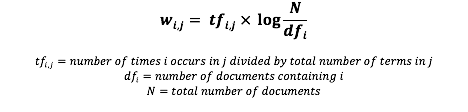

#### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [21]:
from nltk.corpus import wordnet as wn

def clean_text(text):
    #Remove Punctuation
    text   = "".join([word.lower() for word in text if word not in string.punctuation]) 
    #Remove numbers
    text   = re.sub('[a-z0-9]+[0-9]+','',text) #Removes cases like a9 or 99
    text   = re.sub('[0-9]+[a-z0-9]+','',text) #Removes cases like 6th
    text   = re.sub('[0-9]+','',text)          #Removes remaining single digit numbers
    
    tokens = re.split('\W+',text)
    
    # With lemmatizing
    #text   = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) >2] 

    #Without lemmatizing or stemming
    #text   = [word for word in tokens if word not in stopwords and len(word)>2] 

    # With stemming
    # Conditions: if 1. word is not a stopword, 2. length of word more than 2 chars, 3. and is an english word
    text   = [ps.stem(word) for word in tokens if word not in stopwords and len(word)>2 and len(wn.synsets(word))>0]  

    return text

data['clean_text'] = data['raw_text'].apply(lambda x: clean_text(x))
data['clean_text'][0]

['well',
 'educ',
 'person',
 'graduat',
 'univers',
 'profession',
 'person',
 'know',
 'four',
 'languag',
 'complet',
 'english',
 'pashto',
 'urdu',
 'best',
 'knowledg',
 'inform',
 'internet',
 'educ',
 'peopl',
 'welfar',
 'foundat',
 'help',
 'poor',
 'peopl',
 'refuge',
 'prepar',
 'school',
 'fee',
 'cloth',
 'prepar',
 'water',
 'peopl',
 'make',
 'bridg',
 'way',
 'chariti',
 'nomine',
 'differ',
 'meet',
 'youth',
 'young',
 'elder',
 'commun',
 'talk',
 'help',
 'peopl',
 'tribal',
 'religi',
 'ethnic',
 'relat',
 'work',
 'human',
 'way',
 'control',
 'overcom',
 'problem',
 'commun',
 'peopl',
 'know',
 'work',
 'like',
 'help',
 'also',
 'work',
 'volunt',
 'like',
 'know',
 'real',
 'person']

### Apply Tfidf Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf    = tfidf_vect.fit_transform(data['raw_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(770, 9238)
['aachen', 'ab', 'aba', 'abaca', 'aback', 'abandon', 'abass', 'abat', 'abattoir', 'abdomin', 'abduct', 'abe', 'abel', 'abet', 'abid', 'abidjan', 'abil', 'abject', 'abkhazia', 'abl', 'abli', 'abnorm', 'aboard', 'abod', 'abolish', 'abolit', 'abort', 'abound', 'abraham', 'abras', 'abreast', 'abroad', 'abrog', 'abrupt', 'absenc', 'absent', 'absente', 'absolut', 'absorb', 'absorpt', 'abstract', 'abuja', 'abund', 'abundantli', 'abus', 'abut', 'abysm', 'academ', 'academi', 'academia', 'academician', 'acanthu', 'acapulco', 'acceler', 'accent', 'accentu', 'accept', 'access', 'accessori', 'accid', 'accident', 'acclaim', 'accolad', 'accommod', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accra', 'accredit', 'accru', 'accumul', 'accur', 'accuraci', 'accus', 'accustom', 'ace', 'acess', 'achiev', 'acid', 'acknowledg', 'acquaint', 'acquir', 'acquisit', 'acquit', 'acr', 'acrobat', 'acronym', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'a

In [24]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,aachen,ab,aba,abaca,aback,abandon,abass,abat,abattoir,abdomin,...,zimbabw,zimbabwean,zinc,zona,zonal,zone,zoo,zoolog,zoom,zoonot
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


## 3) Feature Engineering: 

### 3.1) Feature for text length

In [25]:
# data['text_len'] = data['raw_text'].apply(lambda x: len(x) - x.count(" "))
data['text_len'] = data['clean_text'].apply(lambda x: len(x))
data.head()
print(data['text_len'].max())
print(data['text_len'].min())
# print(data.iloc[48])
# print(data['text_len'])
# print(data.iloc[9]['raw_text'])
# print(data.iloc[9]['clean_text'])
# print(data.iloc[9]['text_len'])
# print(data['text_len'].max())
# print(data['text_len'].min())
# print(data['text_len'].sort_values())


1309
0


### 3.2) Feature for % of text with keywords category with sample  keywords dict

#### Dataframe for keywords

In [26]:
keywords  = {
    "innovative": ["innovative","innovate","advance","introduce","disruptive", "disrupting","disrupt","transformative","transform" "new", "novel","pioneer","discover","discovery","ground-breaking","groundbreaking","break-through","unorthodox","fresh","unprecedented","original","ingenious","imaginative","invent","revolutionary","contemporary","creative",'foresee',"propose","unique","inter-disciplinary","multi-disciplinary","uncommon"],
    "initiative": ["initiative","initiate","ability","able", "capability","work", "take","lead","leadership","led","seek","sought",'steer',"direct","conduct","form","figure out","solve","find","solution","invent","invention","start","initiate","initiative", "make","made","build","built","introduce","create","reach","develop","advance","educate","organise","organize","endeavour","endeavor","deal","embark","mission","campaign","formulate","find","found","promote","founder","leader","enterprise","service","design","construct","break","broke","participate","participation","expose","unravel","help","eradicate","fight","innovate","discover","bring","brought","enforce"],
    "impact":["change","impact","impactful",'contribute','contribution',"influence","influential","affect","effect","role","alter","steer","strengthen","transform","modify","shape","accomplish","succeed","succeeded","success","accomplishment","result","outcome","reach","strengthen","improve","save","bolster","lift"],
    "optimistic": ["positive","optimism","optimistic","vision","visionary","envision","grit","faith","humanity","humanitarian","confidence","confident","encouraging","hope","aspire","aspirations","hopeful","constructive","pragmatic","productive","perceptive","delightful","cheerful","loving","caring","tolerance","dreamt","dream","inspired","encouraging","forward-looking"],
    "courageous": ["courageous","courage","unyielding","risk-taking","fight","fought","resist","dispute","unwilling","daring",'dare', "combat","push","contend","reject","stand firm","stood firm","unyielding","tenacious","pertinacious", "persistent","bravery","brave",'withstand',"defy","defiance","defiant","relentless","unwavering","resolute","nonconformist","challenge","intolerant",'persistent','oppose', "opposition",'contend', 'struggle',"against",'push',"stubborn"],
    "principled": ["ethical","ethics","moral","morality","empathy","caring","principled","systematic" ,"justice","persistance","justness",'caring',"compassion","compassionate","passion","passionate","boldness","bold","audacious","fight back","oppose","kindness","motivated","motivation","disciplined"],
    "global":["global","scalable","applicable","many countries","scale","several countries", "other contexts","other countries","globally","other regions","scalability","world","worldwide","world-wide","ripple","other areas","similar areas","other cases","abroad","foreign"],
    "positives":["effective","effectiveness","meaningful","significant","strong","relevant","substantial","major","great","highly","exceptional","exemplary","remarkable","example","excellent","excellence","stellar","marvelous","prominent","prominence","constructive",'substantial', 'important',"promising","powerful","exceptional","phenomenal","potent","ground-breaking","revolutionary","disruptive","pioneering","optimistic","extremely","pivotal","central","scalable","global","applicable","undoubtedly","unquestionably","fighting","justice","lead","eradicate","build","change","impact","ethic","moral","innovative","initiative"],
    "negatives":["grant","funding","fund","lack of funds","lack of financial resources","money","finance"]
}

s1= pd.Series(keywords["innovative"])
s2= pd.Series(keywords["initiative"])
s3= pd.Series(keywords["impact"])
s4= pd.Series(keywords["optimistic"])
s5= pd.Series(keywords["courageous"])
s6= pd.Series(keywords["principled"])
s7= pd.Series(keywords["global"])
s8= pd.Series(keywords["positives"])
s9= pd.Series(keywords["negatives"])

keys = list(keywords.keys())
df_keys = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9], axis=1)
df_keys.columns = keys
df_keys = df_keys.fillna('')
df_keys

,innovative,initiative,impact,optimistic,courageous,principled,global,positives,negatives
0,innovative,initiative,change,positive,courageous,ethical,global,effective,grant
1,innovate,initiate,impact,optimism,courage,ethics,scalable,effectiveness,funding
2,advance,ability,impactful,optimistic,unyielding,moral,applicable,meaningful,fund
3,introduce,able,contribute,vision,risk-taking,morality,many countries,significant,lack of funds
4,disruptive,capability,contribution,visionary,fight,empathy,scale,strong,lack of financial resources
5,disrupting,work,influence,envision,fought,caring,several countries,relevant,money
6,disrupt,take,influential,grit,resist,principled,other contexts,substantial,finance
7,transformative,lead,affect,faith,dispute,systematic,other countries,major,
8,transformnew,leadership,effect,humanity,unwilling,justice,globally,great,
9,novel,led,role,humanitarian,daring,persistance,other regions,highly,


#### Combined Set of all Keys- Stemmed

In [27]:
all_keys = list(pd.concat([s1,s2,s3,s4,s5,s6,s7,s8], axis=0))
stem_keys_set = set([ps.stem(word) for word in all_keys])
print(stem_keys_set)

{'led', 'kind', 'potent', 'bold', 'endeavour', 'endeavor', 'enterpris', 'relentless', 'leadership', 'resolut', 'embark', 'highli', 'servic', 'contribut', 'organ', 'propos', 'fresh', 'oppos', 'moral', 'erad', 'foreign', 'impact', 'aspir', 'remark', 'deal', 'creativ', 'alter', 'combat', 'compass', 'bolster', 'expos', 'seek', 'promin', 'direct', 'unquestion', 'introduc', 'major', 'other context', 'resist', 'unpreced', 'persist', 'form', 'founder', 'import', 'creat', 'improv', 'marvel', 'product', 'imagin', 'scalabl', 'central', 'against', 'scale', 'conduct', 'lead', 'abroad', 'brave', 'disciplin', 'excel', 'disrupt', 'role', 'just', 'influenti', 'motiv', 'transformnew', 'unorthodox', 'several countri', 'meaning', 'stubborn', 'hope', 'envis', 'risk-tak', 'result', 'ground-break', 'percept', 'shape', 'capabl', 'brought', 'reach', 'educ', 'other region', 'courag', 'innov', 'break', 'great', 'revolutionari', 'power', 'sought', 'initi', 'contend', 'origin', 'discov', 'confid', 'pertinaci', 'ma

In [28]:
# def similar_words(word):
#     synonyms = [lemma.name() for syn in wn.synsets(word) for lemma in syn.lemmas()]
#     antonyms = [lemma.name() for syn in wn.synsets(word) for lemma in syn.lemmas() if lemma.antonyms()]
#     print("Synonyms",set(synonyms)) 
#     print("Antonyms",set(antonyms)) 

# df_keys.applymap(similar_words)

#### Function to Stem all keys in Dataframe

In [29]:
def stem_keys(key):
    key = ps.stem(key)
    return key

df_keys_stemmed = df_keys.applymap(stem_keys)
df_keys_stemmed

,innovative,initiative,impact,optimistic,courageous,principled,global,positives,negatives
0,innov,initi,chang,posit,courag,ethic,global,effect,grant
1,innov,initi,impact,optim,courag,ethic,scalabl,effect,fund
2,advanc,abil,impact,optimist,unyield,moral,applic,meaning,fund
3,introduc,abl,contribut,vision,risk-tak,moral,many countri,signific,lack of fund
4,disrupt,capabl,contribut,visionari,fight,empathi,scale,strong,lack of financial resourc
5,disrupt,work,influenc,envis,fought,care,several countri,relev,money
6,disrupt,take,influenti,grit,resist,principl,other context,substanti,financ
7,transform,lead,affect,faith,disput,systemat,other countri,major,
8,transformnew,leadership,effect,human,unwil,justic,global,great,
9,novel,led,role,humanitarian,dare,persist,other region,highli,


### 3.2 a) Get Overall Keyword Percent

In [30]:
def count_keys(text,keys):
    if '' in keys:
        keys.remove('')
        
    text   = "".join([word.lower() for word in text if word not in string.punctuation]) 
    #Remove numbers
    text   = re.sub('[a-z0-9]+[0-9]+','',text) #Removes cases like a9 or 99
    text   = re.sub('[0-9]+[a-z0-9]+','',text) #Removes cases like 6th
    text   = re.sub('[0-9]+','',text)          #Removes remaining single digit numbers
    tokens = re.split('\W+',text)
    # With stemming
#     text   = " ".join([ps.stem(word) for word in tokens] )
    text   = " ".join([ps.stem(word) for word in tokens if word not in stopwords and len(word)>2 and wn.synsets(word)] )
    
    count    = sum([text.count(key) for key in keys if key in text])
#     print(count)
    text_len = len(re.split('\s+',text))
#     print(text_len)
#     print(round((count/text_len)*100,3))
    return round((count/text_len)*100,3)

data['keys%'] = data['raw_text'].apply(lambda x: count_keys(x,stem_keys_set))

data.head()

# data['keys%'].max()

,ID,nominator_fn,nominator_ln,nominee_fn,nominee_ln,raw_text,label_short,label_final,clean_text,text_len,keys%
0,4054559128179150173,Wajid,Khan,zz_Zahidullah,Zaland,"Mr.Zahid Zaland is a well educated person. He is graduated from the university and he is a professional personality. He know Four languages completely; English, Pashto, Dari-Persion and Urdu.\nHe has best knowledge in Information Technolgy (IT), Internet and Educating people.\n\nHe has a Welfare Foundation which helps with poor people, refugees...",Not Pass,Not Pass,"[well, educ, person, graduat, univers, profession, person, know, four, languag, complet, english, pashto, urdu, best, knowledg, inform, internet, educ, peopl, welfar, foundat, help, poor, peopl, refuge, prepar, school, fee, cloth, prepar, water, peopl, make, bridg, way, chariti, nomine, differ, meet, youth, young, elder, commun, talk, help, peo...",70,18.571
1,4059395972021686177,Miskieh,Leona,zz_Yvette,Mugudo,"Yvette is a courageous Young person and always choose to see glass as half full instead of half empty. She tries to create environmental awareness through visiting schools and giving a talk on the same, her blog dabbed as 'environmentandculture.wordpress.com' and her YouTube Mitchelle Mugudo where by she writes on environmental issues or topics...",Not Pass,Not Pass,"[courag, young, person, alway, choos, see, glass, half, full, instead, half, empti, tri, creat, environment, awar, visit, school, give, talk, blog, dab, write, environment, issu, topic, talk, environment, topic, activ, respect, person, experi, began, way, back, colleg, forefront, mobil, colleg, student, particip, environment, activ, environment...",76,11.842
2,4055640883115054025,Jenna,Nambi,zz_Yusuf,Mutyaba,"The nominee is an agricultural graduate from Makerere University and he has held several leadership positions such as a youth Chairman in Wakiso District. \nIn Wakiso, the nominee formulated a garbage management system that has helped the Town Council to manage garbage. He has published several agricultural manuals to enable farmers access tec...",Not Pass,Not Pass,"[nomine, agricultur, graduat, univers, held, sever, leadership, posit, youth, chairman, district, nomine, formul, garbag, manag, system, help, town, council, manag, garbag, publish, sever, agricultur, manual, enabl, farmer, access, technic, inform, easili, organ, youth, villag, bank, eas, access, credit, growth, town, council, consist, organ, i...",63,25.397
3,4042818493317586098,Rosemarie Alanna,Choo-Shee-Nam,zz_Vishnu,Doerga,Global reach in terms of the scope of topics and training he completed. History on the Action Coach website.\nHis own portfolio an admixture of business acumen and academics\nHappier work environment and knowledge of working smarter.,Not Pass,Not Pass,"[global, reach, term, scope, topic, train, complet, histori, action, coach, websit, portfolio, admixtur, busi, acumen, academ, happier, work, environ, knowledg, work, smarter]",22,22.727
4,4052779110216539211,Tonika,Yepthomi,zz_Tonika,Yepthomi,She was awarded the prestigious International Leaders in Education Program ( ILEP)in the year 2016 by the US Department of State,Not Pass,Not Pass,"[award, prestigi, intern, leader, educ, program, year, depart, state]",9,33.333


### 3.2 b) Get Keyword Percent Theme-wise

In [31]:
data['innovative%'] = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['innovative'])))
data['initiative%'] = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['initiative'])))
data['impact%']     = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['impact'])))
data['optimistic%'] = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['optimistic'])))
data['courageous%'] = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['courageous'])))
data['principled%'] = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['principled'])))
data['global%']     = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['global'])))
data['positives%']  = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['positives'])))
data['negatives%']  = data['raw_text'].apply(lambda x: count_keys(x,set(df_keys_stemmed['negatives'])))

### 3.2 c) Get No. of Keywords Theme-wise

### Plots of Features

In [32]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

### Plot for Text Length

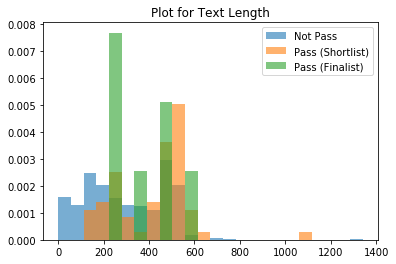

In [33]:
# np.seterr(divide='ignore', invalid='ignore')
bins = np.linspace(0, 1340, 25)

pyplot.hist(data[data['label_short']=='Not Pass']['text_len'], bins, alpha=0.6, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['text_len'], bins, alpha=0.6, normed=True, label='Pass (Shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['text_len'], bins, alpha=0.6, normed=True, label='Pass (Finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Text Length")
pyplot.show()

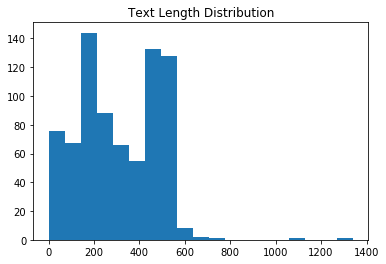

In [45]:
bins = np.linspace(0, 1340, 20)

pyplot.hist(data['text_len'], bins)
pyplot.title("Text Length Distribution")
pyplot.show()

### Plot for Overall Keyword Percent

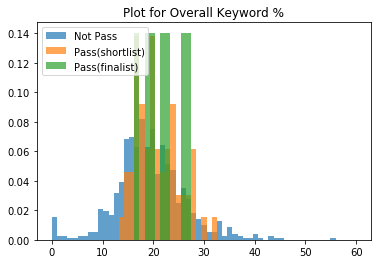

In [60]:
bins = np.linspace(0, 60, 60)
# 
pyplot.hist(data[data['label_short']=='Not Pass']['keys%'], bins, alpha=0.7, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['keys%'], bins, alpha=0.7, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['keys%'], bins, alpha=0.7, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper left')
pyplot.title("Plot for Overall Keyword %")
pyplot.show()

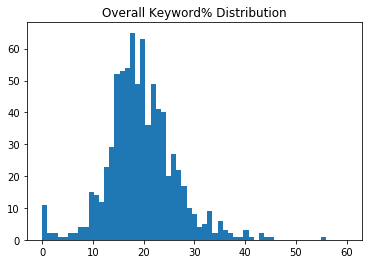

55.0

In [62]:
bins = np.linspace(0, 60, 60)
pyplot.hist(data['keys%'], bins)
pyplot.title("Overall Keyword% Distribution")
pyplot.show()
data['keys%'].max()

### Plot for Themewise Keyword Percent

#### Innovative:

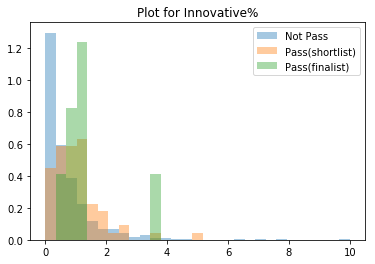

In [35]:
bins = np.linspace(0, 10, 30)
pyplot.hist(data[data['label_short']=='Not Pass']['innovative%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['innovative%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['innovative%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Innovative%")
pyplot.show()

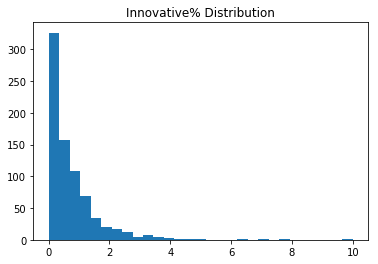

In [63]:
bins = np.linspace(0, 10, 30)
pyplot.hist(data['innovative%'], bins)
pyplot.title("Innovative% Distribution")
pyplot.show()

#### Initiative

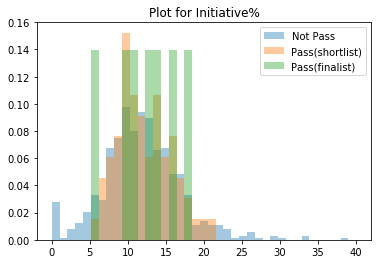

In [69]:
bins = np.linspace(0, 40, 40)
pyplot.hist(data[data['label_short']=='Not Pass']['initiative%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['initiative%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['initiative%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Initiative%")
pyplot.show()

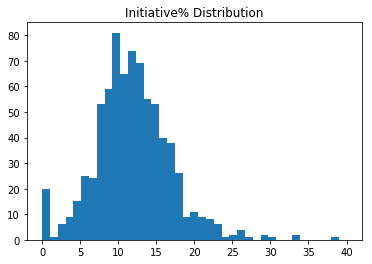

38.889000000000003

In [68]:
bins = np.linspace(0, 40, 40)
pyplot.hist(data['initiative%'], bins)
pyplot.title("Initiative% Distribution")
pyplot.show()
data['initiative%'].max()

#### Impact:

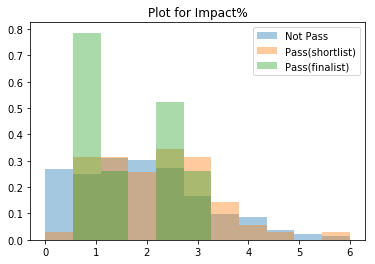

In [37]:
bins = np.linspace(0, 6, 12)
pyplot.hist(data[data['label_short']=='Not Pass']['impact%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['impact%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['impact%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Impact%")
pyplot.show()

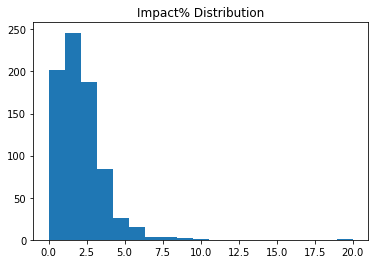

20.0

In [71]:
bins = np.linspace(0, 20, 20)
pyplot.hist(data['impact%'], bins)
pyplot.title("Impact% Distribution")
pyplot.show()
data['impact%'].max()

#### Optimistic:

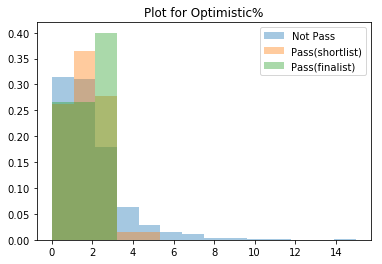

In [74]:
bins = np.linspace(0, 15, 15)
pyplot.hist(data[data['label_short']=='Not Pass']['optimistic%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['optimistic%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['optimistic%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Optimistic%")
pyplot.show()

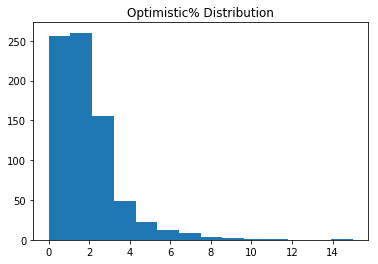

14.286

In [75]:
bins = np.linspace(0, 15, 15)
pyplot.hist(data['optimistic%'], bins)
pyplot.title("Optimistic% Distribution")
pyplot.show()
data['optimistic%'].max()

#### Courageous:

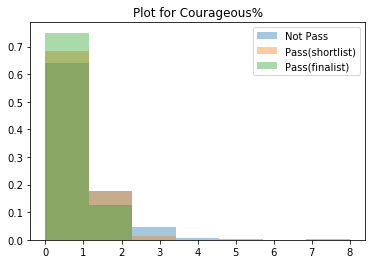

In [81]:
bins = np.linspace(0, 8, 8)
pyplot.hist(data[data['label_short']=='Not Pass']['courageous%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['courageous%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['courageous%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Courageous%")
pyplot.show()

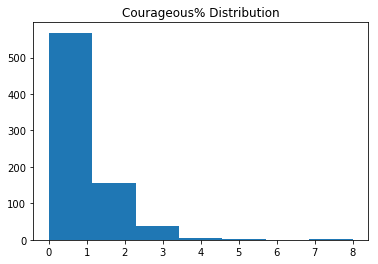

7.6920000000000002

In [85]:
bins = np.linspace(0, 8, 8)
pyplot.hist(data['courageous%'], bins)

pyplot.title("Courageous% Distribution")
pyplot.show()
data['courageous%'].max()

#### Principled:

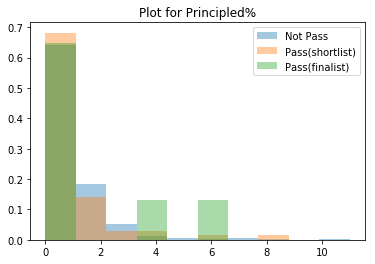

In [91]:
bins = np.linspace(0, 11, 11)
pyplot.hist(data[data['label_short']=='Not Pass']['principled%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['principled%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['principled%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Principled%")
pyplot.show()

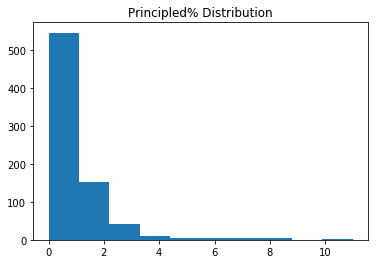

10.526

In [89]:
bins = np.linspace(0, 11, 11)
pyplot.hist(data['principled%'], bins)

pyplot.title("Principled% Distribution")
pyplot.show()
data['principled%'].max()

#### Global:

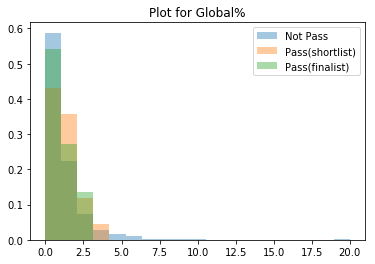

In [95]:
bins = np.linspace(0, 20, 20)
pyplot.hist(data[data['label_short']=='Not Pass']['global%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['global%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['global%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Global%")
pyplot.show()

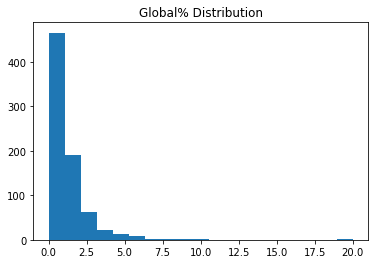

20.0

In [96]:
bins = np.linspace(0, 20, 20)
pyplot.hist(data['global%'], bins)
pyplot.title("Global% Distribution")
pyplot.show()
data['global%'].max()

#### Positives:

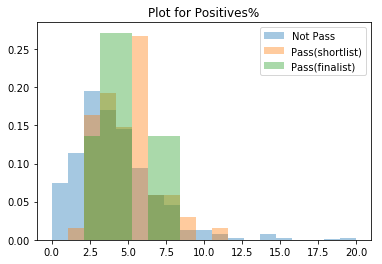

In [99]:
bins = np.linspace(0, 20, 20)
pyplot.hist(data[data['label_short']=='Not Pass']['positives%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['positives%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['positives%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Positives%")
pyplot.show()

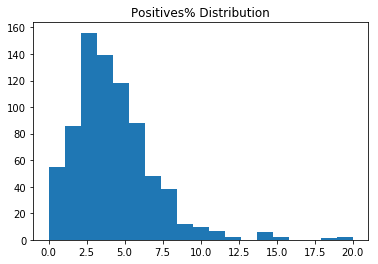

20.0

In [100]:
bins = np.linspace(0, 20, 20)
pyplot.hist(data['positives%'], bins)

pyplot.title("Positives% Distribution")
pyplot.show()
data['positives%'].max()

#### Negatives: (specifically words related to grant/funding requests)

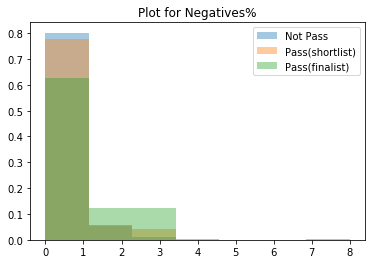

In [102]:
bins = np.linspace(0, 8, 8)
pyplot.hist(data[data['label_short']=='Not Pass']['negatives%'], bins, alpha=0.4, normed=True, label='Not Pass')
pyplot.hist(data[data['label_short']=='Pass']['negatives%'], bins, alpha=0.4, normed=True, label='Pass(shortlist)')
pyplot.hist(data[data['label_final']=='Pass']['negatives%'], bins, alpha=0.4, normed=True, label='Pass(finalist)')
pyplot.legend(loc='upper right')
pyplot.title("Plot for Negatives%")
pyplot.show()

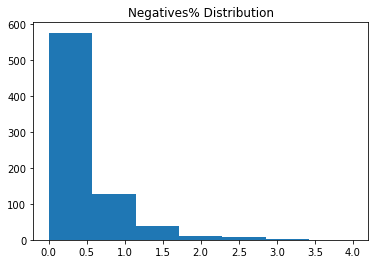

7.3170000000000002

In [101]:
bins = np.linspace(0, 8, 8)
pyplot.hist(data['negatives%'], bins)
pyplot.title("Negatives% Distribution")
pyplot.show()
data['negatives%'].max()

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

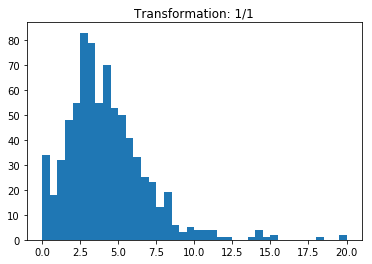

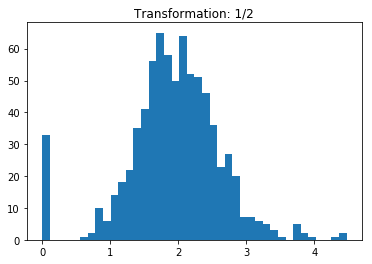

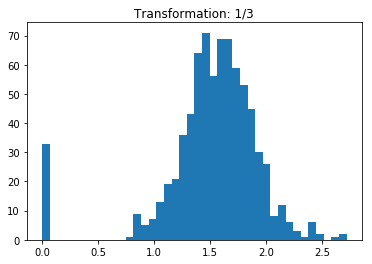

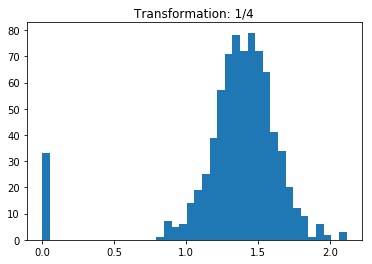

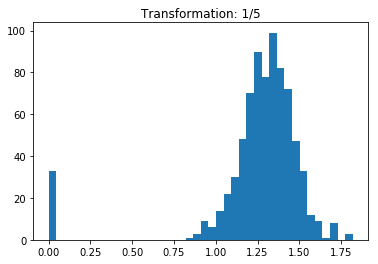

In [105]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['positives%'])**(1/i),bins=40)
    pyplot.title('Transformation: 1/{}'.format(str(i)))
    pyplot.show()

## Machine Learning Models:

##### Background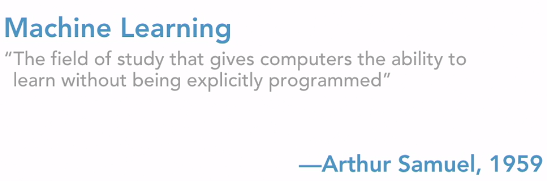


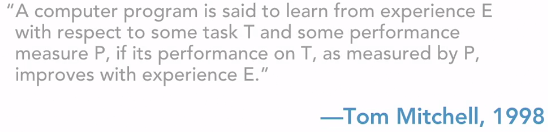

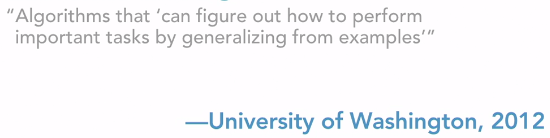

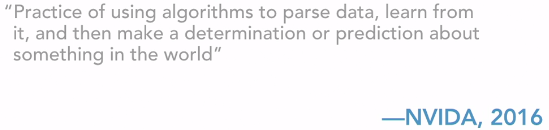

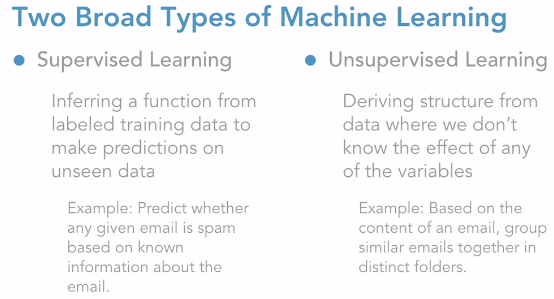

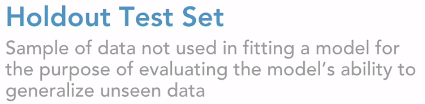

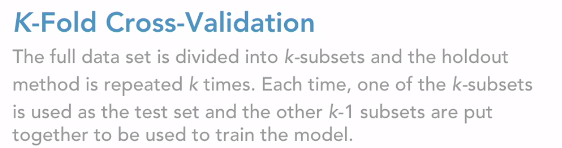

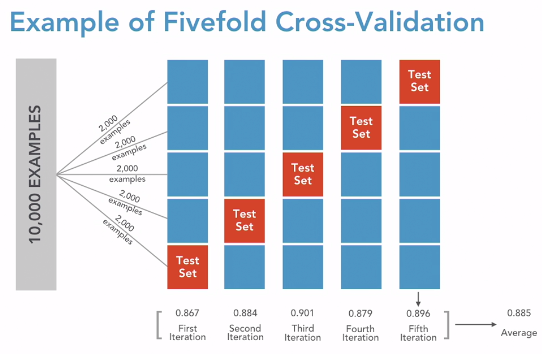

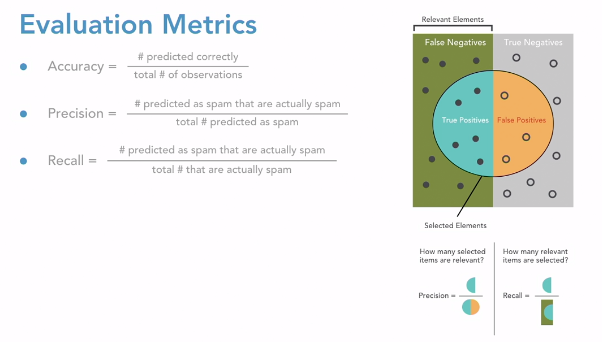

## Ensemble Learning:

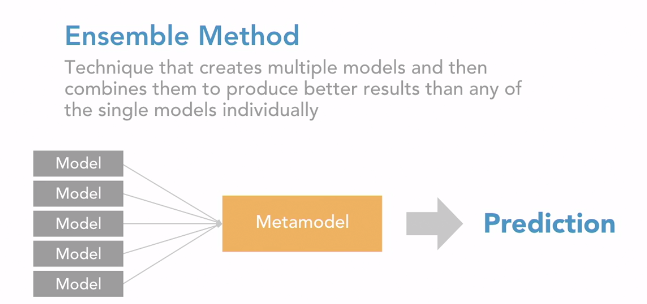

### Random Forest:

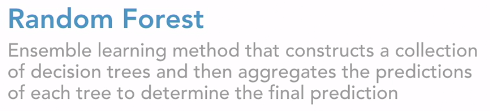

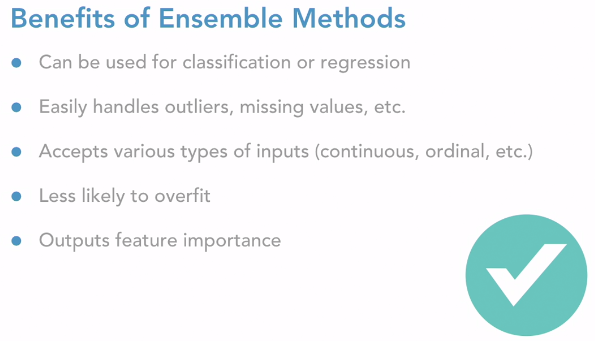

### Building Machine Learning Classifiers: Building a basic Random Forest model